# Predicting Sales using marketing data

## Aim
The aim of the project is to predict sales (in million) using the following data

- TV promotion budget (in million)
- Social Media promotion budget (in million)
- Radio promotion budget (in million)
- Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer


<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis</b> </div>

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [12]:
sns.set(rc={'figure.figsize':(18, 10)})

#### Display the names of the rows and columns.


In [4]:
df = pd.read_csv("Data_HSS.csv")

#### View the head of the data


In [4]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


#### How many columns and rows has the data got ?


In [5]:
df.shape

(4572, 5)

#### How many null values has the dataset got ?


In [6]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

#### What data types have the columns got ?


In [35]:
X.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
dtype: object

#### As there are few missing values, we can drop the null values !


In [5]:
df = df.dropna()

#### How many columns and rows has this new data got ?


In [6]:
df.shape

(4546, 5)

#### Examine the head of the data


In [9]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


#### Describe the data set

In [10]:
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


This shows that the columns of data 

- Have got same values in all columns
- Has got different means across the columns
- Has got different standard deviation

#### Plot the pair plot of dataset which would plot the relation across numerical columns and histograms in the diagonal columns

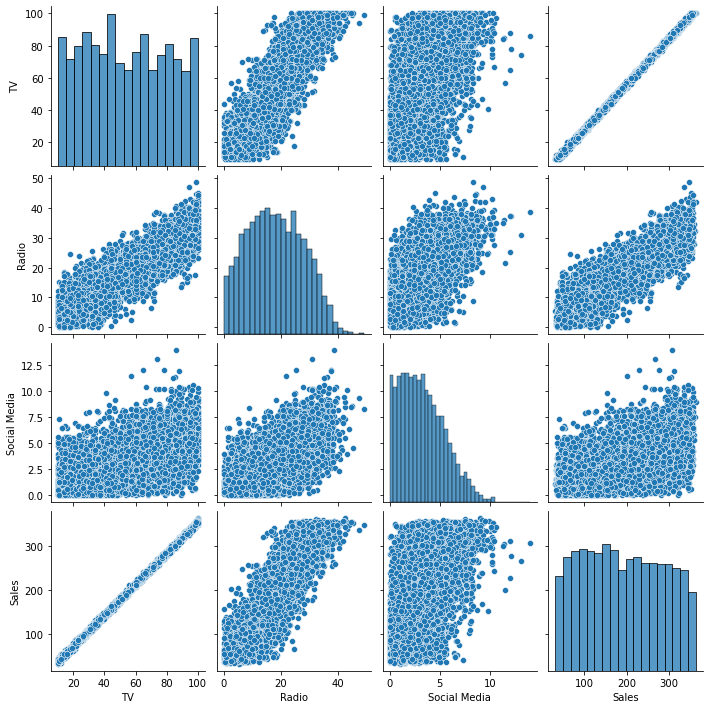

In [7]:
sns.pairplot(df)

The above pair plot shows that:-

- As the TV promotion increase, Sales increase !
- As the Radio promotion budget increase, Sales increase !
- As the Social Media promotion budget increase, Sales increase !

To view this more clearly, we can make scatter plots for each of the numerical columns and see how they affect Sales !

In [13]:
import plotly.express as px

#### Plot TV promotion against Sales

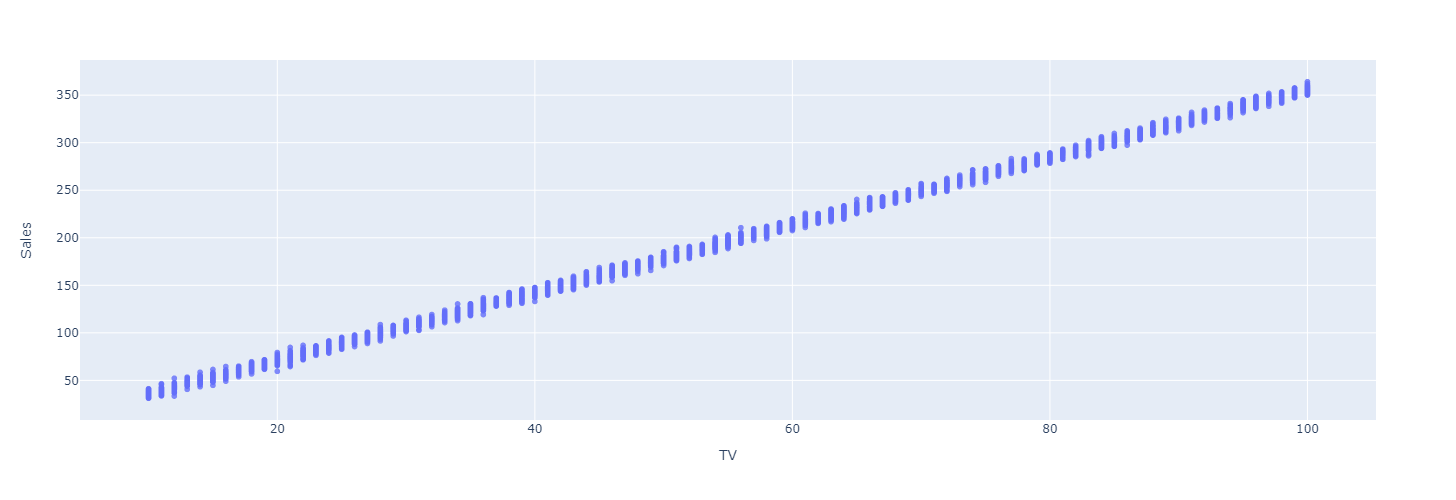

In [120]:
fig_TV = px.scatter(df, x="TV", y="Sales", hover_data=['Sales'], opacity=0.8, height=500)
fig_TV.show()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

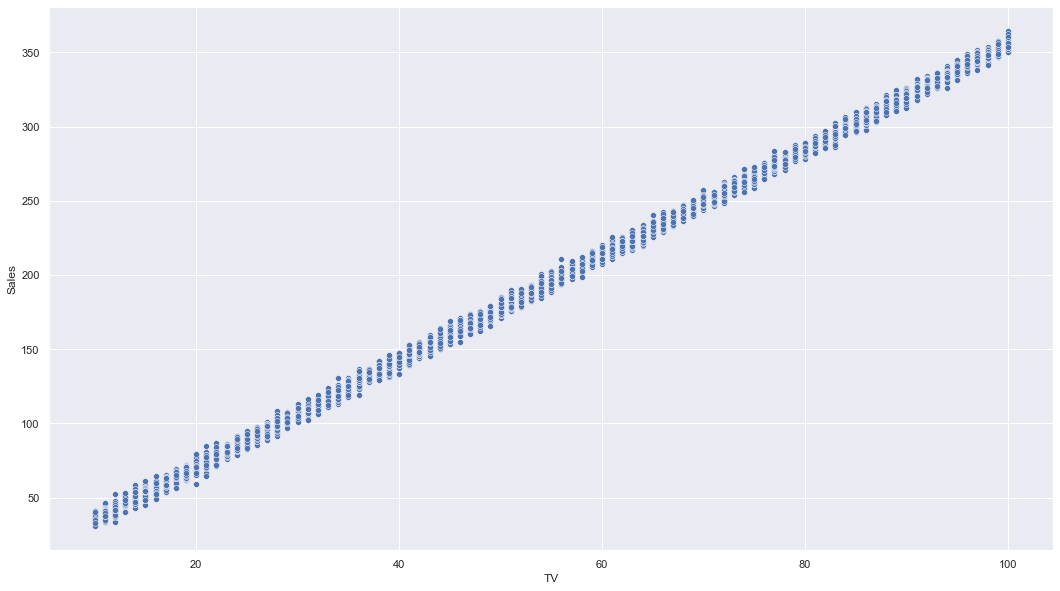

In [13]:
sns.scatterplot(data=df, x='TV', y='Sales' )

<div class="alert alert-block alert-success">
<b>Outcome : </b> The scatter plot shows clearly that as the TV promotion budget increases, Sales increase too !
</div>

#### Plot Radio promotion against Sales

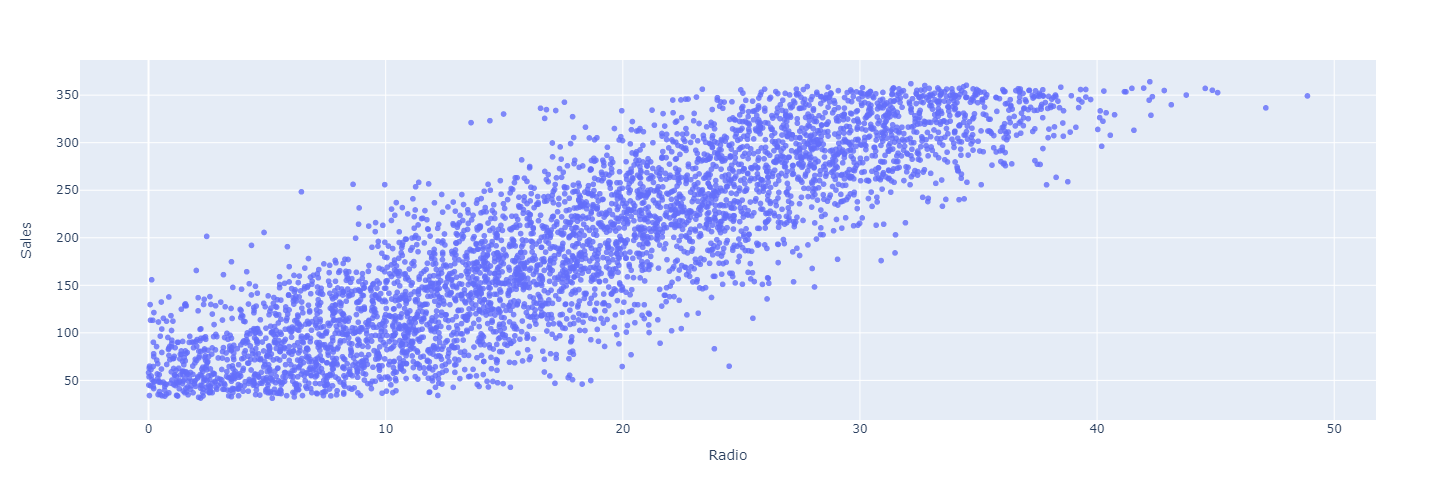

In [117]:
fig_radio = px.scatter(df, x="Radio", y="Sales", hover_data=['Sales'], opacity=0.8, height=500)
fig_radio.show()

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

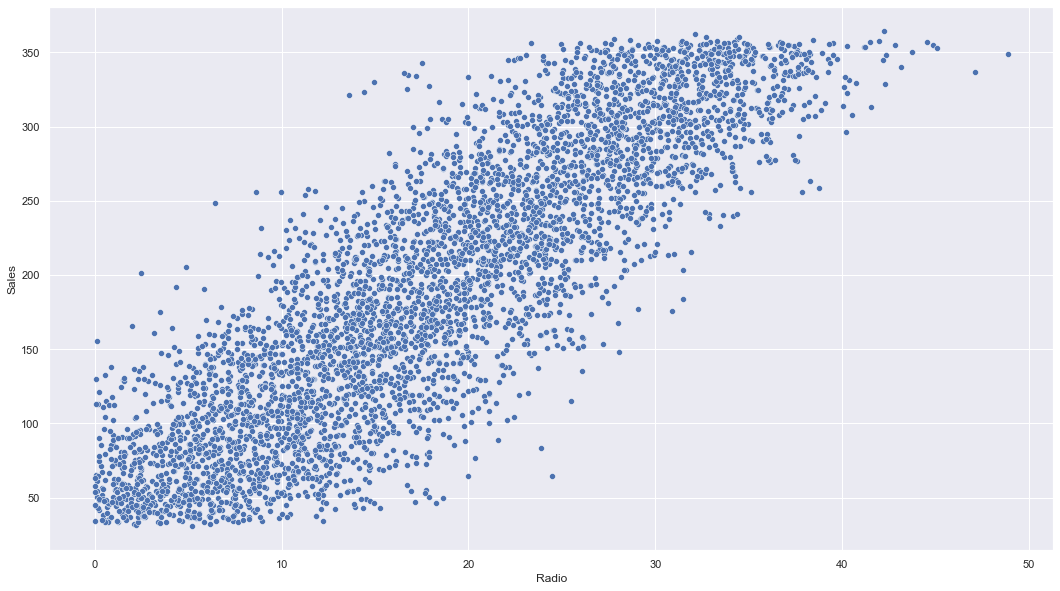

In [14]:
sns.scatterplot(data=df, x='Radio', y='Sales' )

<div class="alert alert-block alert-success">
<b>Outcome : </b> The scatter plot shows clearly that as the Radio promotion budget increases, Sales increase too !
</div>

#### Plot Social Media promotion budget against Sales

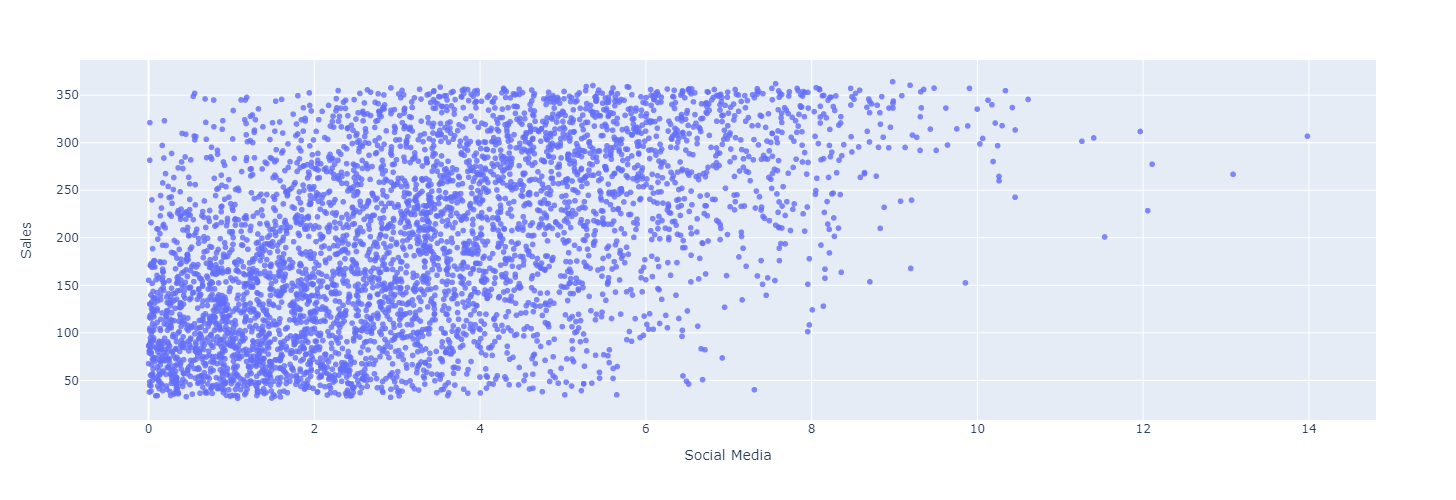

In [118]:
fig_sm = px.scatter(df, x="Social Media", y="Sales", hover_data=['Sales'], opacity=0.8, height=500)
fig_sm.show()

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

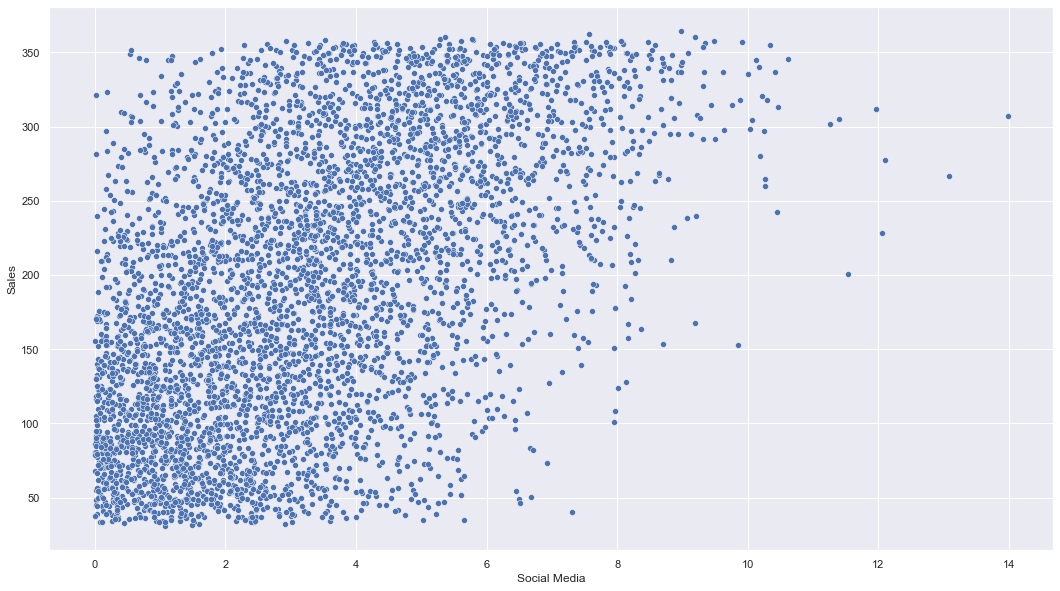

In [15]:
sns.scatterplot(data=df, x='Social Media', y='Sales' )

<div class="alert alert-block alert-success">
<b>Outcome : </b> The scatter plot shows the trend has got variation but as the Social Media budget increases, Sales increase too !
</div>

#### Plot box plot of Influencers against Sales to see the distribution and effect of different influencers on Sales

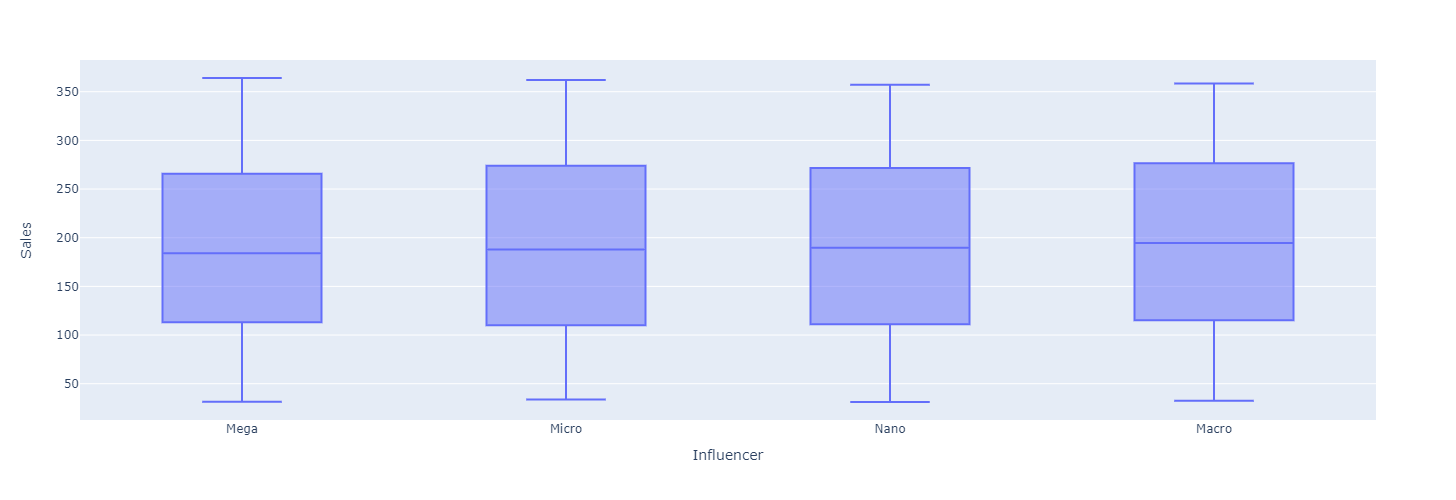

In [122]:
fig_influencer = px.box(df, x="Influencer", y="Sales", hover_data=['Sales'], height=500)

fig_influencer.show()

In [138]:
print(df.groupby("Influencer").Sales.mean())


Influencer
Macro    196.066150
Mega     190.412908
Micro    191.578370
Nano     191.708827
Name: Sales, dtype: float64


In [23]:
df.Influencer.value_counts()

Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: Influencer, dtype: int64

<div class="alert alert-block alert-success">
<b>Outcome : </b> The box plot shows that there is not much difference in the distribution which is then confirmed when we use groupby. The means values are close to each other as well ! The value count of the infuencers are similar too
</div>

#### Separate the features as X and targets as y

In [24]:
X = df.drop('Sales', axis=1)

In [25]:
y = df['Sales']

#### Import all libraries in the following block of code for readable code

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

#### Divide the data into training and testing sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Divide the columns in numerical and categorical columns

In [141]:
# list of categorical columns
cat_cols = ["Influencer"]

# list of numerical columns
num_cols = ["TV", "Radio", "Social Media"]

my_cols = cat_cols + num_cols
print(my_cols)

['Influencer', 'TV', 'Radio', 'Social Media']


#### Make a custom transformer using TransformerMixin which would round off the numerical columns

In [143]:
#example code for np.around()

some_list = [2.005, 3.562, 4.558]
print(np.around(some_list))

[2. 4. 5.]


In [67]:
from sklearn.base import TransformerMixin

class logroundoffTransformer(TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Xroundedoff = np.around(X)
        return Xroundedoff
        
        

#### Make preprocessing Pipeline for Numerical and Categorical columns

In [68]:
# Preprocessing for numerical data

#numerical_transformer = StandardScaler()

numerical_transformer = Pipeline(steps=[
    ('custom_roundoff', logroundoffTransformer())   
])


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


#### Combine preprocessing Pipelines using Column Transformer and apply transformer to each categories of columns

In [69]:
# Bundle preprocessing for numerical and categorical data as preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

<div class="alert alert-block alert-info">
<b>MODEL 1 : Linear Regression</b> 
</div>

#### Define the algorithm, then use preprocessor from above and create the model Pipeline

In [70]:
# Define model

model_linreg = LinearRegression()

# Define the steps of the model
steps_linreg = [('pre_processor_name', preprocessor),
                ('linear_regressor', model_linreg)]

# Define the Pipeline for steps of model
pipeline_linreg = Pipeline(steps_linreg)


#### Now choose the hyperparameters of the model which would run and use GridSearchCV

In [71]:
parameters_linreg = {
    'linear_regressor__fit_intercept': ["True", "False"]}



cv_linreg = GridSearchCV(estimator=pipeline_linreg, param_grid=parameters_linreg, cv=5, scoring='neg_mean_squared_error')



#### Fit the Pipeline

In [72]:
# fit the pipeline

cv_linreg.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processor_name',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('custom_roundoff',
                                                                                          <__main__.logroundoffTransformer object at 0x0000023E57F0D790>)]),
                                                                         ['TV',
                                                                          'Radio',
                                                                          'Social '
                                                                          'Media']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                             

#### What is the best hyperparameter ?

In [78]:
cv_linreg.best_params_

{'linear_regressor__fit_intercept': 'True'}

#### Create prediction on the test set

In [75]:
y_pred_linreg = cv_linreg.predict(X_test)

#### Check what are the mean squared error and mean absolute error

In [148]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

In [76]:
mean_squared_error(y_test, y_pred_linreg)

8.324575987424877

In [146]:
mean_absolute_error(y_test, y_pred_linreg)

2.312758664527186

<div class="alert alert-block alert-info">
<b>MODEL 2 : Ridge Regression</b> 
</div>

#### Doing the same procedure as Linear regression but defining model as Ridge and taking alpha as the hyperparameter

In [79]:
from sklearn.linear_model import Ridge

In [80]:
# Define model

model_ridge = Ridge()


steps_ridge = [('pre_processor_name', preprocessor),
                ('ridge_regressor', model_ridge)]
pipeline_ridge = Pipeline(steps_ridge)



# Now make the param_grid for GridSearchCV
parameters_ridge = {
    'ridge_regressor__alpha': [0.5, 1, 2, 5, 10]}


cv_ridge = GridSearchCV(estimator=pipeline_ridge, param_grid=parameters_ridge, cv=5, scoring='neg_mean_squared_error')


# fit the pipeline
cv_ridge.fit(X_train, y_train)



In [89]:
cv_ridge.best_params_

{'ridge_regressor__alpha': 10}

In [91]:
y_pred_ridge = cv_ridge.predict(X_test)

In [93]:
mean_squared_error(y_test, y_pred_ridge)

8.324458503595626

In [149]:
mean_absolute_error(y_test, y_pred_ridge)

2.3127457487595318

<div class="alert alert-block alert-info">
<b>MODEL 3 : Lasso Regression</b> 
</div>

In [94]:
from sklearn.linear_model import Lasso

In [95]:
# Define model

model_lasso = Lasso()


steps_lasso = [('pre_processor_name', preprocessor),
                ('lasso_regressor', model_lasso)]


pipeline_lasso = Pipeline(steps_lasso)


# Now make the param_grid for GridSearchCV

parameters_lasso = {
    'lasso_regressor__alpha': [0.5, 1, 2, 5, 10]}


cv_lasso = GridSearchCV(estimator=pipeline_lasso, param_grid=parameters_lasso, cv=5, scoring='neg_mean_squared_error')


# fit the pipeline

cv_lasso.fit(X_train, y_train)


In [101]:
cv_lasso.best_params_

{'lasso_regressor__alpha': 0.5}

In [103]:
y_pred_lasso = cv_lasso.predict(X_test)

In [151]:
mean_squared_error(y_test, y_pred_lasso)

8.311598098047565

In [150]:
mean_absolute_error(y_test, y_pred_lasso)

2.311022362674852

<div class="alert alert-block alert-info">
<b>BEST MODEL</b> 
</div>

In [156]:
MSE_Linear = mean_squared_error(y_test, y_pred_linreg)

print(MSE_Linear)

8.324575987424877


In [157]:
MSE_Ridge = mean_squared_error(y_test, y_pred_ridge)

print(MSE_Ridge)

8.324458503595626


In [158]:
MSE_Lasso = mean_squared_error(y_test, y_pred_lasso)

print(MSE_Lasso)

8.311598098047565


<div class="alert alert-block alert-success">
<b>RECOMMENDED MODEL : Lasso Regression </b> because it has the minimum Mean Squared Error and minimum Mean Absolute Error.
</div>